100%|██████████| 15/15 [00:40<00:00,  3.25s/it]A


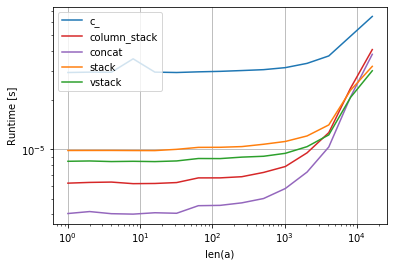

In [2]:
import matplotlib
import numpy
import perfplot

perfplot.show(
    setup=lambda n: numpy.random.rand(n),  # or simply setup=numpy.random.rand
    kernels=[
        lambda a: numpy.c_[a, a],
        lambda a: numpy.stack([a, a]).T,
        lambda a: numpy.vstack([a, a]).T,
        lambda a: numpy.column_stack([a, a]),
        lambda a: numpy.concatenate([a[:, None], a[:, None]], axis=1),
    ],
    labels=["c_", "stack", "vstack", "column_stack", "concat"],
    n_range=[2 ** k for k in range(15)],
    xlabel="len(a)",
    # More optional arguments with their default values:
    # title=None,
    # logx="auto",  # set to True or False to force scaling
    # logy="auto",
    # equality_check=numpy.allclose,  # set to None to disable "correctness" assertion
    # automatic_order=True,
    # colors=None,
    # target_time_per_measurement=1.0,
    # time_unit="s",  # set to one of ("auto", "s", "ms", "us", or "ns") to force plot units
    # relative_to=1,  # plot the timings relative to one of the measurements
    # flops=lambda n: 3*n,  # FLOPS plots
)

100%|██████████| 16/16 [00:53<00:00,  3.88s/it]A


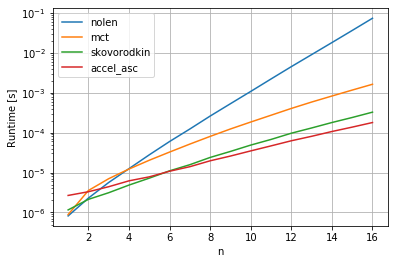

In [3]:
import perfplot
import collections


def nolen(number):
    answer = set()
    answer.add((number, ))
    for x in range(1, number):
        for y in nolen(number - x):
            answer.add(tuple(sorted((x, ) + y)))
    return answer


def skovorodkin(n):
    return set(skovorodkin_yield(n))


def skovorodkin_yield(n, I=1):
    yield (n,)
    for i in range(I, n//2 + 1):
        for p in skovorodkin_yield(n-i, i):
            yield (i,) + p


def accel_asc(n):
    return set(accel_asc_yield(n))


def accel_asc_yield(n):
    a = [0 for i in range(n + 1)]
    k = 1
    y = n - 1
    while k != 0:
        x = a[k - 1] + 1
        k -= 1
        while 2 * x <= y:
            a[k] = x
            y -= x
            k += 1
        l = k + 1
        while x <= y:
            a[k] = x
            a[l] = y
            yield tuple(a[:k + 2])
            x += 1
            y -= 1
        a[k] = x + y
        y = x + y - 1
        yield tuple(a[:k + 1])


def mct(n):
    partitions_of = []
    partitions_of.append([()])
    partitions_of.append([(1,)])
    for num in range(2, n+1):
        ptitions = set()
        for i in range(num):
            for partition in partitions_of[i]:
                ptitions.add(tuple(sorted((num - i, ) + partition)))
        partitions_of.append(list(ptitions))
    return partitions_of[n]


perfplot.show(
    setup=lambda n: n,
    kernels=[
        nolen,
        mct,
        skovorodkin,
        accel_asc,
        ],
    n_range=range(1, 17),
    logy=True,
    # https://stackoverflow.com/a/7829388/353337
    equality_check=lambda a, b:
        collections.Counter(set(a)) == collections.Counter(set(b)),
    xlabel='n'
    )